## 문장데이터 토큰화

- sudo apt-get install g++ openjdk-8-jdk
- bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
- pip install konlpy

### KoNLPy 설치하기
- https://konlpy.org/ko/latest/install/

In [1]:
#형태소 분석기 사용

from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [2]:
# 라이브러리 불러오기

import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

[학습환경 구성 및 데이터 다운]
 
- wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
- mkdir -p ~/aiffel/sp_tokenizer/data
- mv korean-english-park.train.tar.gz ~/aiffel/sp_tokenizer/data
- cd ~/aiffel/sp_tokenizer/data
- tar -xzvf korean-english-park.train.tar.gz

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


###  한국어 병렬 말뭉치
- https://github.com/jungyeul/korean-parallel-corpora

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


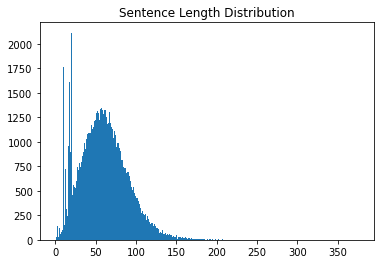

In [4]:
#  문장의 최단 길이, 최장 길이, 평균 길이를 구한 후 문장 길이 분포를 막대그래프로 표현해 주는 소스

min_len = 999
max_len = 0
sum_len = 0

#중복 요소 미제거

for sen in raw:  # raw 앞서 다운로드받은 데이터가 담긴 변수
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int) # np.zeros 주어진 형태와 타입을 갖는 0으로 채워진 어레이를 반환합

for sen in raw:  # 중복 요소 제거시 for sen in cleaned_corpus: 으로 변경된다.
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
# 길이가 1인 문장 확인하기

def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [6]:
# 길이별 확인 할수 있도록 함수 정의

for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


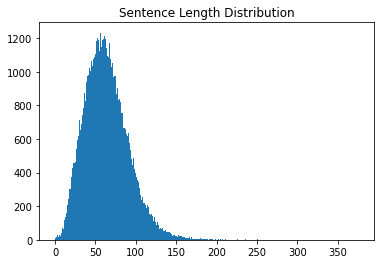

In [8]:
# 중복을 제거한 후, 앞에서 분포를 확인한 소스를 다시 실행

min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

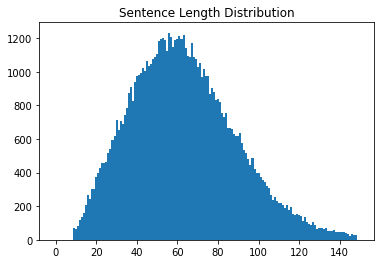

In [9]:
# 너무 짧은 데이터는 노이즈로 작용할수 있으므로 길이 10미만 제거

max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 2) 공백 기반 토큰화

In [10]:
# 정제된 데이터 공백 기반으로 토큰화

def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

<MARK> tokenize() 함수</MARK>
- 위와 같이 tf.keras.preprocessing.text.Tokenizer에 corpus를 주고 tokenizer.fit_on_texts(corpus)을 하면 토크나이저 내부적으로 단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동 생성해 주는것!

In [11]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장

split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [12]:
# 공백 기반 토큰화를 진행한 후, 단어 사전의 길이를 확인

split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [13]:
# 생성된 단어사전 확인

for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


### 3) 형태소 기반 토큰화 (학습중 의미 파악 용이)
- nouns : 명사 추출
- morphs : 형태소 추출
- pos : 품사 부착

In [14]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence) # morphs : 형태소 추출

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))  #corpus(말뭉치)

In [15]:
# 형태소 기반 토큰화 후 단어 사전 길이 확인

mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


- 구글 BERT 모델: 한국어 전용 말뭉치(코퍼스) 훈련 X, 다국어
- 엑소브레인은 한국어 망뭉치(코퍼스)에 특화된 형태로 언어모델과 토크나이저가 훈련되었음
    - SentencePiece 같은 Subword 기반 토크나이저는 현재 유지보수 잘되고 있는듯

### 텐서 문장으로 디코딩

#### tokenizer.sequences_to_texts() 함수를 사용하여 Decoding 해보기

In [16]:
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

이 에 대해 장 피에르 라파랭 전 총리 는 “ 사르코지 는 재충전 이 필요 하 다 ” 며 그 의 편 을 들 었 다 .


#### tokenizer.index_word 를 사용하여 Decoding 해보기

In [17]:
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

이 에 대해 장 피에르 라파랭 전 총리 는 “ 사르코지 는 재충전 이 필요 하 다 ” 며 그 의 편 을 들 었 다 . 


# 프로젝트: SentencePiece 사용하기

### Step 1. SentencePiece 설치하기

In [18]:
! pip install sentencepiece

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


### Step 2. SentencePiece 모델 학습

In [19]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 root root 376892 Oct  3 18:57 korean_spm.model
-rw-r--r-- 1 root root 146388 Oct  3 18:57 korean_spm.vocab


In [20]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### Step 3. Tokenizer 함수 작성

In [21]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [22]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1949 5662    5    4 7975 1983    3    0    0    0    0    0    0    0]
 [ 107 1638  101    4    0  419   11    4   14    0 1969    3    3    3]]


### Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

In [23]:
#폴더생성
!mkdir ~/aiffel/sp_tokenizer/sentiment_classification

mkdir: cannot create directory ‘/aiffel/aiffel/sp_tokenizer/sentiment_classification’: File exists


In [24]:
#리뷰데이터 받아오기
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt  
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
!mv ratings_*.txt ~/aiffel/sp_tokenizer/sentiment_classification 

--2021-10-03 18:57:04--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  --.-KB/s    in 0.08s   

2021-10-03 18:57:04 (176 MB/s) - ‘ratings_train.txt’ saved [14628807/14628807]

--2021-10-03 18:57:05--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (4.7M) [text/plain]
Saving

[추가 학습]
- ! wget + DOWNLOAD-URL  : 단일 파일받기
- ! mv 파일명 + 이동경로 : 하나 이상의 파일이나 디렉터리를 한 장소에서 한 다른 장소로 이동하도록 만드는 유닉스 명령어

In [25]:
# 1. 데이터 준비와 확인

import pandas as pd
import urllib.request
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import re

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from sklearn.model_selection import train_test_split

# 데이터를 읽기
train_data = pd.read_table('~/aiffel/sp_tokenizer/sentiment_classification/ratings_train.txt') #경로 변경 완료
test_data = pd.read_table('~/aiffel/sp_tokenizer/sentiment_classification/ratings_test.txt')   #경로 변경 완료

display(train_data.head(6))
display(test_data.head(6))
print("훈련 데이터 개수 : {}, 테스트 데이터 개수: {}".format(len(train_data), len(test_data)))

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1


훈련 데이터 개수 : 150000, 테스트 데이터 개수: 50000


#### 1) 학습  및 테스트 데이터 중복 제거

In [26]:
train_data.drop_duplicates(subset=['document'], inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)

print('중복제거 후 학습데이터 문장의 개수 : ',len(train_data['document']))
print('중복제거 후 테스트데이터 문장의 개수 : ',len(test_data['document']))

중복제거 후 학습데이터 문장의 개수 :  146183
중복제거 후 테스트데이터 문장의 개수 :  49158


#### 2) 학습 및 테스트 데이터 Nan 결측치 제거

In [27]:
train_data = train_data.dropna(how = 'any')
test_data =test_data.dropna(how='any')

print('결측치제거 후 학습데이터 문장의 개수 : ',len(train_data['document']))
print('결측치제거 후 테스트데이터 문장의 개수 : ',len(test_data['document']))

결측치제거 후 학습데이터 문장의 개수 :  146182
결측치제거 후 테스트데이터 문장의 개수 :  49157


[중복제거]

- ex 노드는 중복값  drop_duplicates 메서드 이용하여 제거 , train_data.drop_duplicates(subset=['document'], inplace=True)

- nlp 노드는 중복제거시 cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
    - set은 집합을 정의하는 자료형인데, 중복을 허용하지 않아 변환 과정에서 자동으로 중복된 요소를 제거
    - 대신 list의 순서가 뒤죽박죽될 수 있으니, 만약 번역 데이터처럼 쌍을 이뤄야 하는 경우라면 주의해서 사용

좀 햇갈리는 부분 이다.

#### 3) 데이터 전처리

In [28]:
# 학습 데이터 전처리
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [29]:
# 테스트 데이터 전처리
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data[:5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [30]:
## 바뀐 학습 데이터 내부에 결측치가 있는지 재확인
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


id            0
document    789
label         0
dtype: int64


In [31]:
## 바뀐 테스트 데이터 내부에 결측치가 있는지 재확인
test_data['document'] = test_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
test_data['document'].replace('', np.nan, inplace=True)
print(test_data.isnull().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


id            0
document    305
label         0
dtype: int64


In [32]:
# 수정된 학습 데이터 내 결측치 제거 후 학습 데이터의 개수 확인
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145393


In [33]:
# 수정된 테스트 데이터 내 결측치 제거 후 테스트 데이터의 개수 확인
test_data = test_data.dropna(how = 'any')
print(len(test_data))

48852


In [34]:
# 정제된 학습 데이터, 테스트 데이터 확인
display(train_data.head(6))
display(test_data.head(6))

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0


,id,document,label
0,6270596,굳 ㅋ,1
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,7898805,음악이 주가 된 최고의 음악영화,1
6,6315043,진정한 쓰레기,0


문장의 최단 길이: 1
문장의 최장 길이: 140
문장의 평균 길이: 33


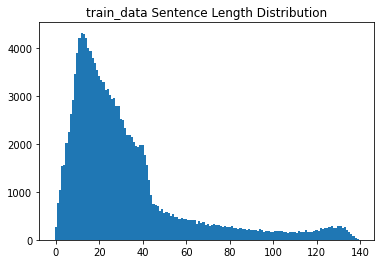

In [35]:
#  문장의 최단 길이, 최장 길이, 평균 길이를 구한 후 문장 길이 분포를 막대그래프로 표현해 주는 소스

min_len = 999
max_len = 0
sum_len = 0

for sen in train_data['document']:  # train_data['document'] 앞서 다운로드받은 데이터가 담긴 변수
    length = len(sen)
    
    #문장 최소 길이는?
    if min_len > length: min_len = length
    
    #문장 최대 길이는?
    if max_len < length: max_len = length
    
    # 전체 문장 합치고 길이 확인
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(train_data['document']))

sentence_length = np.zeros((max_len), dtype=np.int) # np.zeros 주어진 형태와 타입을 갖는 0으로 채워진 어레이를 반환

for sen in train_data['document']:   
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("train_data Sentence Length Distribution")
plt.show()

In [36]:
## 학습 데이터, 테스트 데이터 모두 각각 길이가 45 이하인 데이터까지만 취급합니다.
## 아래 과정은 document의 내용만을 list로 전달하기 때문에 SentencePiece 모델을 적용할 때 용이합니다.
train_list = [s for s in train_data['document'] if (len(s) <= 45)]
test_list = [s for s in test_data['document'] if (len(s) <= 45)]

train_list = list(set(train_list))
test_list = list(set(test_list))

train_df = pd.DataFrame(train_list)
test_df = pd.DataFrame(test_list)

In [37]:
new_train_df = pd.merge(train_data, train_df, how='inner', left_on='document', right_on=0)
new_test_df = pd.merge(test_data, test_df, how='inner', left_on='document', right_on=0)

train_data = new_train_df[['id', 'document', 'label']]
test_data = new_test_df[['id', 'document', 'label']]

In [38]:
display(train_data.head(6))
display(test_data.head(6))

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0
5,7797314,원작의 긴장감을 제대로 살려내지못했다,0


,id,document,label
0,6270596,굳 ㅋ,1
1,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
2,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
3,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
4,7898805,음악이 주가 된 최고의 음악영화,1
5,6315043,진정한 쓰레기,0


In [39]:
## 학습 데이터, 테스트 데이터 토큰화
X_train, X_train_word_index, X_train_index_word = sp_tokenize(s, train_data['document'])
X_test, X_test_word_index, X_test_index_word = sp_tokenize(s, test_data['document'])
## label 값을 y_train, y_test로 처리
y_train = np.array(list(train_data['label']))
y_test = np.array(list(test_data['label']))

In [40]:
print("토큰화 후 학습 데이터의 수:",len(X_train))
print("토큰화 후 학습 데이터의 라벨 수:",len(y_train))

토큰화 후 학습 데이터의 수: 118437
토큰화 후 학습 데이터의 라벨 수: 118437


In [41]:
train_input, val_input, train_target, val_target = train_test_split(X_train, y_train, test_size=0.2, random_state=20)

### 1) 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기

In [42]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 root root 376892 Oct  3 18:57 korean_spm.model
-rw-r--r-- 1 root root 146388 Oct  3 18:57 korean_spm.vocab


### 2) 학습된 모델로 sp_tokenize() 메소드 구현하기

### 3) 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기

In [43]:
s = spm.SentencePieceProcessor()
print(s.Load('korean_spm.model'))

def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

True


### 4) KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기

In [45]:
# 모델 설계
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다.

In [52]:
# 1) LSTM 모델 1번째!!
model = keras.Sequential(name='LSTM1')
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "LSTM1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          128000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 모델 학습

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_input, train_target, epochs=5, validation_data=(val_input, val_target))

Epoch 1/5
2961/2961 [==============================] - 28s 9ms/step - loss: 0.5524 - accuracy: 0.7005 - val_loss: 0.4182 - val_accuracy: 0.8073
Epoch 2/5
2961/2961 [==============================] - 26s 9ms/step - loss: 0.3946 - accuracy: 0.8190 - val_loss: 0.4061 - val_accuracy: 0.8155
Epoch 3/5
2961/2961 [==============================] - 26s 9ms/step - loss: 0.3644 - accuracy: 0.8349 - val_loss: 0.3932 - val_accuracy: 0.8204
Epoch 4/5
2961/2961 [==============================] - 26s 9ms/step - loss: 0.3436 - accuracy: 0.8450 - val_loss: 0.3973 - val_accuracy: 0.8200
Epoch 5/5
2961/2961 [==============================] - 26s 9ms/step - loss: 0.3229 - accuracy: 0.8563 - val_loss: 0.3953 - val_accuracy: 0.8199


In [54]:
# 모델 테스트셋으로 평가  
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)


1245/1245 - 5s - loss: 0.4002 - accuracy: 0.8177
[0.40024393796920776, 0.8177092671394348]


### (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기
- 1회차 : vocab_size = 10000 시도
- 2회차 : vocab_size = 8000 으로 시도

In [55]:
# 2) LSTM 모델 2번째!!
vocab_size = 8000    # 어휘 사전의 크기
word_vector_dim = 16  # 단어 하나를 표현하는 임베딩 벡터의 차원수 (변경가능)

from tensorflow import keras
model = keras.Sequential(name='LSTM2')
model.add(keras.layers.Embedding(vocab_size,word_vector_dim))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "LSTM2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          128000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_input, train_target, epochs=5, validation_data=(val_input, val_target))

Epoch 1/5
2961/2961 [==============================] - 29s 9ms/step - loss: 0.6476 - accuracy: 0.5666 - val_loss: 0.4273 - val_accuracy: 0.8075
Epoch 2/5
2961/2961 [==============================] - 26s 9ms/step - loss: 0.4110 - accuracy: 0.8137 - val_loss: 0.4031 - val_accuracy: 0.8135
Epoch 3/5
2961/2961 [==============================] - 26s 9ms/step - loss: 0.3761 - accuracy: 0.8318 - val_loss: 0.3979 - val_accuracy: 0.8191
Epoch 4/5
2961/2961 [==============================] - 26s 9ms/step - loss: 0.3473 - accuracy: 0.8438 - val_loss: 0.3933 - val_accuracy: 0.8220
Epoch 5/5
2961/2961 [==============================] - 26s 9ms/step - loss: 0.3276 - accuracy: 0.8561 - val_loss: 0.3961 - val_accuracy: 0.8207


In [57]:
# 모델 테스트셋으로 평가  
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)


1245/1245 - 5s - loss: 0.3958 - accuracy: 0.8216
[0.3957618772983551, 0.8215514421463013]


## 루브릭
- 코퍼스 분석, 전처리, SentencePiece 적용, 토크나이저 구현 및 동작이 빠짐없이 진행되었는가
- SentencePiece 토크나이저가 적용된 Text Classifier 모델이 정상적으로 수렴하여 80% 이상의 test accuracy가 확인되었다.
- SentencePiece 토크나이저를 활용했을 때의 성능을 다른 토크나이저 혹은 SentencePiece의 다른 옵션의 경우와 비교하여 분석을 체계적으로 진행하였다

# 회고
- 기존에 Exploration 7 의 이해도가 낮았던 탓에 이해하는데 시간이 좀 소요 되었다. 특히 중복값 제거하는하는 부분이 많이 햇갈렸다.
-Exploration 7 노드의 중복값은 drop_duplicates 메서드 이용하여 제거 , train_data.drop_duplicates(subset=['document'], inplace=True)
-nlp 노드는 중복제거시 cleaned_corpus = list(set(raw)) # set를 사용해서 중복을 제거한다. 
set은 집합을 정의하는 자료형인데, 중복을 허용하지 않아 변환 과정에서 자동으로 중복된 요소를 제거,대신 list의 순서가 뒤죽박죽될 수 있으니, 만약 번역 데이터처럼 쌍을 이뤄야 하는 경우라면 주의해서 사용하라고 한다. 

-  step1~step3은 루브릭 평가 기준은 아닌데 프로젝트에 꼭 작성해야되는것처럼 되어 있어서 추후 다시 추가 작업을 하였다.

-  고잉 디퍼 nlp 2번째 노드 데이터 +  Exploration 7 과 합쳐진 프로젝트인데 초기에 배웠던 내용이라 기억이 많이 사라져서 이론을 정리하는데 시간이 꽤 걸렸다. 추후에 밑시딥2로 개념을 다시 잡아야될것 같다. 

- 자연어처리 모델인 LSTM에 적용하였고, 2번의 시도 모두 80% 이상의 accuracy를 얻었다.